### Import 10 year stock data of Mag-7 stocks using YFinance API

In [1]:
# Import libraries
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np

# Define the tickers to get data for - Microsoft, Apple, Google, Meta, Amazon, Nvidia and Tesla
tickers = ['MSFT', 'AAPL', 'GOOGL', 'META', 'AMZN', 'NVDA', 'TSLA']




#Grab data from yfinance api

# #Set start and end date of data download
# start_date = "2014-09-01"
# end_date = "2024-08-31"



# # Define function to get stock price history
# def get_stock_data(ticker):
#     stock = yf.Ticker(ticker)
#     df = stock.history(start=start_date, end=end_date, interval='1d')
#     return df[['Open', 'Close', 'High', 'Low']]

# # Get stock price history for all the stocks in all_data dataframe
# all_data = {ticker: get_stock_data(ticker) for ticker in tickers}

# # Combine all data into a single DataFrame
# final_df_stock_prices = pd.concat(all_data, axis=1)
# final_df_stock_prices.columns = pd.MultiIndex.from_product([tickers, ['Open', 'Close', 'High', 'Low']])




# Use saved data already obtained from yfinance api

#Preprocess data to be in the same shape as yfinance api data
final_df_stock_prices = pd.read_csv('../data/mag7-daily.csv')
final_df_stock_prices.columns = ['_'.join(i) for i in zip(final_df_stock_prices.columns.get_level_values(0).tolist(), final_df_stock_prices.iloc[0,:].replace(np.nan,'').replace(0,'').tolist())]
final_df_stock_prices.drop([0,1], inplace=True)
final_df_stock_prices = final_df_stock_prices.rename(columns={final_df_stock_prices.columns[0]: "Date"})
final_df_stock_prices = final_df_stock_prices.set_index("Date", drop=True)
final_df_stock_prices.columns = pd.MultiIndex.from_product([tickers, ['Open', 'Close', 'High', 'Low', 'PE', 'EPS']])

#Remove "PE" and "EPS" columns as they contain PE and EPS data of today,not historic data
final_df_stock_prices = final_df_stock_prices.drop(columns=['PE', 'EPS'], level=1)




final_df_stock_prices

MSFT                      \
                                         Open               Close   
Date                                                                
2014-09-02 00:00:00-04:00   38.84351728827943   38.55281066894531   
2014-09-03 00:00:00-04:00   38.07399576723615  38.441654205322266   
2014-09-04 00:00:00-04:00   38.25355502803763   38.69816207885742   
2014-09-05 00:00:00-04:00  38.569918217130414   39.25393295288086   
2014-09-08 00:00:00-04:00   39.34796035997921   39.73271942138672   
...                                       ...                 ...   
2024-08-26 00:00:00-04:00   416.3699951171875    413.489990234375   
2024-08-27 00:00:00-04:00   412.8599853515625   413.8399963378906   
2024-08-28 00:00:00-04:00   414.8800048828125   410.6000061035156   
2024-08-29 00:00:00-04:00  414.94000244140625   413.1199951171875   
2024-08-30 00:00:00-04:00   415.6000061035156   417.1400146484375   

                                                                   \
                                         High                 Low   
Date                                                                
2014-09-02 00:00:00-04:00   38.86916681710218   38.34760465344637   
2014-09-03 00:00:00-04:00   38.56990836247368   38.07399576723615   
2014-09-04 00:00:00-04:00   38.70671409616488  38.236454255061645   
2014-09-05 00:00:00-04:00   39.27103372897956  38.569918217130414   
2014-09-08 00:00:00-04:00   40.01487389199392   39.32231084309786   
...                                       ...                 ...   
2024-08-26 00:00:00-04:00   417.2799987792969   411.3399963378906   
2024-08-27 00:00:00-04:00   414.3599853515625              410.25   
2024-08-28 00:00:00-04:00               415.0  407.30999755859375   
2024-08-29 00:00:00-04:00  422.04998779296875   410.6000061035156   
2024-08-30 00:00:00-04:00    417.489990234375   412.1300048828125   

                                         AAPL                      \
                                         Open               Close   
Date                                                                
2014-09-02 00:00:00-04:00  22.876924933653502  22.930200576782227   
2014-09-03 00:00:00-04:00   22.88580977434779  21.962387084960938   
2014-09-04 00:00:00-04:00  21.942409033074313  21.780366897583008   
2014-09-05 00:00:00-04:00   21.93130427474392  21.969039916992188   
2014-09-08 00:00:00-04:00  22.042295962444307  21.833637237548828   
...                                       ...                 ...   
2024-08-26 00:00:00-04:00  226.75999450683594  227.17999267578125   
2024-08-27 00:00:00-04:00               226.0  228.02999877929688   
2024-08-28 00:00:00-04:00   227.9199981689453  226.49000549316406   
2024-08-29 00:00:00-04:00  230.10000610351562   229.7899932861328   
2024-08-30 00:00:00-04:00  230.19000244140625               229.0   

                                                                   \
                                         High                 Low   
Date                                                                
2014-09-02 00:00:00-04:00   23.02786920208824  22.801453646210295   
2014-09-03 00:00:00-04:00  22.908007117609973    21.8824752943781   
2014-09-04 00:00:00-04:00   22.21765982464709   21.70711413814507   
2014-09-05 00:00:00-04:00  22.062269748504942  21.822534444430783   
2014-09-08 00:00:00-04:00  22.044514510993206  21.764824974465643   
...                                       ...                 ...   
2024-08-26 00:00:00-04:00  227.27999877929688  223.88999938964844   
2024-08-27 00:00:00-04:00  228.85000610351562  224.88999938964844   
2024-08-28 00:00:00-04:00  229.86000061035156  225.67999267578125   
2024-08-29 00:00:00-04:00   232.9199981689453   228.8800048828125   
2024-08-30 00:00:00-04:00  230.39999389648438  227.47999572753906   

                                        GOOGL                      ...  \
                                         Open               Close  ...   
Date                     

### Get Macroeconomic indicators' data for the last 10 years from FRED API using an obtained API key

In [2]:
#import library
from fredapi import Fred



# Disable SSL to get the data
import ssl

ssl._create_default_https_context = ssl._create_unverified_context




# Your FRED API key
fred = Fred(api_key='baa48b0f43151bdf469d9c5466a06bf4')

# Get historical GDP (Gross Domestic Product) data
gdp = fred.get_series('GDP', observation_start='2014-09-01')

# Get historical inflation data (CPI - Consumer Price Index)
inflation = fred.get_series('CPIAUCSL', observation_start='2014-09-01')

# Get historical unemployment rate data
unemployment = fred.get_series('UNRATE', observation_start='2014-09-01')

# Get historical data for Retail Sales
retail_sales = fred.get_series('RSAFSNA', observation_start='2014-09-01')

# Get historical data for Industrial Production (Index)
industrial_production = fred.get_series('INDPRO', observation_start='2014-09-01')

# Fetch Monthly Real GDP Index
gdp_data = fred.get_series('A191RL1Q225SBEA', observation_start='2014-06-30')

# Convert to DataFrame
gdp_df = pd.DataFrame(gdp_data, columns=['Real GDP Index'])

# Calculate Monthly GDP Growth (approximation)
gdp_df['GDP Growth (%)'] = gdp_df['Real GDP Index'].pct_change() * 100


# Create a DataFrame to store the data
economic_data = pd.DataFrame({
    'GDP Growth': gdp_df['GDP Growth (%)'],
    'Inflation (CPI)': inflation,
    'Unemployment Rate': unemployment,
    'Retail Sales': retail_sales,
    'Industrial Production': industrial_production
})

#Forward fill missing data
economic_data = economic_data.fillna(method='ffill')

# Display the first few rows of the data
print(economic_data.head())


            GDP Growth  Inflation (CPI)  Unemployment Rate  Retail Sales  \
2014-04-01         NaN              NaN                NaN           NaN   
2014-07-01   -5.660377              NaN                NaN           NaN   
2014-09-01   -5.660377          237.477                5.9      421522.0   
2014-10-01  -60.000000          237.430                5.7      438593.0   
2014-11-01  -60.000000          236.983                5.8      439188.0   

            Industrial Production  
2014-04-01                    NaN  
2014-07-01                    NaN  
2014-09-01               102.9417  
2014-10-01               102.9611  
2014-11-01               103.5978  


/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_9034/2872237362.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_data = economic_data.fillna(method='ffill')


In [3]:
# Get rid of unneeded rows
economic_data_needed = economic_data.iloc[2:,:]
economic_data_needed

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production
2014-09-01,-5.660377,237.477,5.9,421522.0,102.9417
2014-10-01,-60.000000,237.430,5.7,438593.0,102.9611
2014-11-01,-60.000000,236.983,5.8,439188.0,103.5978
2014-12-01,-60.000000,236.252,5.6,501950.0,103.6151
2015-01-01,80.000000,234.747,5.7,398394.0,102.7923
...,...,...,...,...,...
2024-04-01,87.500000,313.207,3.9,700302.0,102.4479
2024-05-01,87.500000,313.225,4.0,744554.0,103.2156
2024-06-01,87.500000,313.049,4.1,701555.0,103.2798
2024-07-01,87.500000,313.534,4.3,725752.0,102.3058


In [4]:
#Convert to daily data from monthly data
economic_data_needed.index = economic_data_needed.index.to_period('M')
economic_data_needed = economic_data_needed.resample('D').ffill()
economic_data_needed

/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_9034/326674431.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  economic_data_needed = economic_data_needed.resample('D').ffill()


,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production
2014-09-01,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417
...,...,...,...,...,...
2024-08-27,87.500000,314.121,4.2,736604.0,103.1389
2024-08-28,87.500000,314.121,4.2,736604.0,103.1389
2024-08-29,87.500000,314.121,4.2,736604.0,103.1389
2024-08-30,87.500000,314.121,4.2,736604.0,103.1389


### Merge macroeconmic indicator data with stock price data

In [5]:
# Converge indexes before merging
final_df_stock_prices.reset_index(inplace=True)
final_df_stock_prices['Date'] = final_df_stock_prices['Date'].str[0:10]
final_df_stock_prices = final_df_stock_prices.set_index('Date', drop=True)

final_df_stock_prices.index = final_df_stock_prices.index.astype('str')
economic_data_needed.index = economic_data_needed.index.astype('str')

# Add multilevel index just as in stock price data before merging
economic_data_needed.columns = pd.MultiIndex.from_product([['Macroeconomic'], economic_data_needed.columns])

#Merge dataframes
economic_data_needed = economic_data_needed.merge(final_df_stock_prices,how="left", left_index=True, right_index=True)

economic_data_needed

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-01     -5.660377         237.477               5.9     421522.0   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
...                  ...             ...               ...          ...   
2024-08-27     87.500000         314.121               4.2     736604.0   
2024-08-28     87.500000         314.121               4.2     736604.0   
2024-08-29     87.500000         314.121               4.2     736604.0   
2024-08-30     87.500000         314.121               4.2     736604.0   
2024-08-31     87.500000         314.121               4.2     736604.0   

                                                MSFT                      \
           Industrial Production                Open               Close   
2014-09-01              102.9417                 NaN                 NaN   
2014-09-02              102.9417   38.84351728827943   38.55281066894531   
2014-09-03              102.9417   38.07399576723615  38.441654205322266   
2014-09-04              102.9417   38.25355502803763   38.69816207885742   
2014-09-05              102.9417  38.569918217130414   39.25393295288086   
...                          ...                 ...                 ...   
2024-08-27              103.1389   412.8599853515625   413.8399963378906   
2024-08-28              103.1389   414.8800048828125   410.6000061035156   
2024-08-29              103.1389  414.94000244140625   413.1199951171875   
2024-08-30              103.1389   415.6000061035156   417.1400146484375   
2024-08-31              103.1389                 NaN                 NaN   

                                                                  AAPL  ...  \
                          High                 Low                Open  ...   
2014-09-01                 NaN                 NaN                 NaN  ...   
2014-09-02   38.86916681710218   38.34760465344637  22.876924933653502  ...   
2014-09-03   38.56990836247368   38.07399576723615   22.88580977434779  ...   
2014-09-04   38.70671409616488  38.236454255061645  21.942409033074313  ...   
2014-09-05   39.27103372897956  38.569918217130414   21.93130427474392  ...   
...                        ...                 ...                 ...  ...   
2024-08-27   414.3599853515625              410.25               226.0  ...   
2024-08-28               415.0  407.30999755859375   227.9199981689453  ...   
2024-08-29  422.04998779296875   410.6000061035156  230.10000610351562  ...   
2024-08-30    417.489990234375   412.1300048828125  230.19000244140625  ...   
2024-08-31                 NaN                 NaN                 NaN  ...   

                          AMZN                                     NVDA  \
                          High                 Low                 Open   
2014-09-01                 NaN                 NaN                  NaN   
2014-09-02              17.125  16.857999801635742   0.4660826623439789   
2014-09-03   17.16349983215332  16.877500534057617  0.46847275825654033   
2014-09-04    17.4689998626709  17.179000854492188   0.4696678939063609   
2014-09-05   17.34149932861328              17.125  0.47827240424554956   
...                        ...                 ...                  ...   
2024-08-27  174.88999938964844              172.25   125.03930989336882   
2024-08-28  173.69000244140625   168.9199981689453    128.1090382745527   
2024-08-29   174.2899932861328  170.80999755859375   121.34962268178353   
2024-08-30  178.89999389648438  172.60000610351562   119.51977696707976   
2024-08-31                 NaN                 NaN                  NaN   

                                          

In [6]:
# Forward fill missing stock price data
economic_data_needed.fillna(method='ffill', inplace=True)
economic_data_needed

/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_9034/2615745460.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_data_needed.fillna(method='ffill', inplace=True)


Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-01     -5.660377         237.477               5.9     421522.0   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
...                  ...             ...               ...          ...   
2024-08-27     87.500000         314.121               4.2     736604.0   
2024-08-28     87.500000         314.121               4.2     736604.0   
2024-08-29     87.500000         314.121               4.2     736604.0   
2024-08-30     87.500000         314.121               4.2     736604.0   
2024-08-31     87.500000         314.121               4.2     736604.0   

                                                MSFT                      \
           Industrial Production                Open               Close   
2014-09-01              102.9417                 NaN                 NaN   
2014-09-02              102.9417   38.84351728827943   38.55281066894531   
2014-09-03              102.9417   38.07399576723615  38.441654205322266   
2014-09-04              102.9417   38.25355502803763   38.69816207885742   
2014-09-05              102.9417  38.569918217130414   39.25393295288086   
...                          ...                 ...                 ...   
2024-08-27              103.1389   412.8599853515625   413.8399963378906   
2024-08-28              103.1389   414.8800048828125   410.6000061035156   
2024-08-29              103.1389  414.94000244140625   413.1199951171875   
2024-08-30              103.1389   415.6000061035156   417.1400146484375   
2024-08-31              103.1389   415.6000061035156   417.1400146484375   

                                                                  AAPL  ...  \
                          High                 Low                Open  ...   
2014-09-01                 NaN                 NaN                 NaN  ...   
2014-09-02   38.86916681710218   38.34760465344637  22.876924933653502  ...   
2014-09-03   38.56990836247368   38.07399576723615   22.88580977434779  ...   
2014-09-04   38.70671409616488  38.236454255061645  21.942409033074313  ...   
2014-09-05   39.27103372897956  38.569918217130414   21.93130427474392  ...   
...                        ...                 ...                 ...  ...   
2024-08-27   414.3599853515625              410.25               226.0  ...   
2024-08-28               415.0  407.30999755859375   227.9199981689453  ...   
2024-08-29  422.04998779296875   410.6000061035156  230.10000610351562  ...   
2024-08-30    417.489990234375   412.1300048828125  230.19000244140625  ...   
2024-08-31    417.489990234375   412.1300048828125  230.19000244140625  ...   

                          AMZN                                     NVDA  \
                          High                 Low                 Open   
2014-09-01                 NaN                 NaN                  NaN   
2014-09-02              17.125  16.857999801635742   0.4660826623439789   
2014-09-03   17.16349983215332  16.877500534057617  0.46847275825654033   
2014-09-04    17.4689998626709  17.179000854492188   0.4696678939063609   
2014-09-05   17.34149932861328              17.125  0.47827240424554956   
...                        ...                 ...                  ...   
2024-08-27  174.88999938964844              172.25   125.03930989336882   
2024-08-28  173.69000244140625   168.9199981689453    128.1090382745527   
2024-08-29   174.2899932861328  170.80999755859375   121.34962268178353   
2024-08-30  178.89999389648438  172.60000610351562   119.51977696707976   
2024-08-31  178.89999389648438  172.60000610351562   119.51977696707976   

                                          

### Create a copy of the DataFrame for processing

In [7]:
final_stocks_df = economic_data_needed.copy()
final_stocks_df

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-01     -5.660377         237.477               5.9     421522.0   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
...                  ...             ...               ...          ...   
2024-08-27     87.500000         314.121               4.2     736604.0   
2024-08-28     87.500000         314.121               4.2     736604.0   
2024-08-29     87.500000         314.121               4.2     736604.0   
2024-08-30     87.500000         314.121               4.2     736604.0   
2024-08-31     87.500000         314.121               4.2     736604.0   

                                                MSFT                      \
           Industrial Production                Open               Close   
2014-09-01              102.9417                 NaN                 NaN   
2014-09-02              102.9417   38.84351728827943   38.55281066894531   
2014-09-03              102.9417   38.07399576723615  38.441654205322266   
2014-09-04              102.9417   38.25355502803763   38.69816207885742   
2014-09-05              102.9417  38.569918217130414   39.25393295288086   
...                          ...                 ...                 ...   
2024-08-27              103.1389   412.8599853515625   413.8399963378906   
2024-08-28              103.1389   414.8800048828125   410.6000061035156   
2024-08-29              103.1389  414.94000244140625   413.1199951171875   
2024-08-30              103.1389   415.6000061035156   417.1400146484375   
2024-08-31              103.1389   415.6000061035156   417.1400146484375   

                                                                  AAPL  ...  \
                          High                 Low                Open  ...   
2014-09-01                 NaN                 NaN                 NaN  ...   
2014-09-02   38.86916681710218   38.34760465344637  22.876924933653502  ...   
2014-09-03   38.56990836247368   38.07399576723615   22.88580977434779  ...   
2014-09-04   38.70671409616488  38.236454255061645  21.942409033074313  ...   
2014-09-05   39.27103372897956  38.569918217130414   21.93130427474392  ...   
...                        ...                 ...                 ...  ...   
2024-08-27   414.3599853515625              410.25               226.0  ...   
2024-08-28               415.0  407.30999755859375   227.9199981689453  ...   
2024-08-29  422.04998779296875   410.6000061035156  230.10000610351562  ...   
2024-08-30    417.489990234375   412.1300048828125  230.19000244140625  ...   
2024-08-31    417.489990234375   412.1300048828125  230.19000244140625  ...   

                          AMZN                                     NVDA  \
                          High                 Low                 Open   
2014-09-01                 NaN                 NaN                  NaN   
2014-09-02              17.125  16.857999801635742   0.4660826623439789   
2014-09-03   17.16349983215332  16.877500534057617  0.46847275825654033   
2014-09-04    17.4689998626709  17.179000854492188   0.4696678939063609   
2014-09-05   17.34149932861328              17.125  0.47827240424554956   
...                        ...                 ...                  ...   
2024-08-27  174.88999938964844              172.25   125.03930989336882   
2024-08-28  173.69000244140625   168.9199981689453    128.1090382745527   
2024-08-29   174.2899932861328  170.80999755859375   121.34962268178353   
2024-08-30  178.89999389648438  172.60000610351562   119.51977696707976   
2024-08-31  178.89999389648438  172.60000610351562   119.51977696707976   

                                          

In [8]:
# Drop NAN rows
final_stocks_df = final_stocks_df.dropna()
final_stocks_df

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
2014-09-06     -5.660377         237.477               5.9     421522.0   
...                  ...             ...               ...          ...   
2024-08-27     87.500000         314.121               4.2     736604.0   
2024-08-28     87.500000         314.121               4.2     736604.0   
2024-08-29     87.500000         314.121               4.2     736604.0   
2024-08-30     87.500000         314.121               4.2     736604.0   
2024-08-31     87.500000         314.121               4.2     736604.0   

                                                MSFT                      \
           Industrial Production                Open               Close   
2014-09-02              102.9417   38.84351728827943   38.55281066894531   
2014-09-03              102.9417   38.07399576723615  38.441654205322266   
2014-09-04              102.9417   38.25355502803763   38.69816207885742   
2014-09-05              102.9417  38.569918217130414   39.25393295288086   
2014-09-06              102.9417  38.569918217130414   39.25393295288086   
...                          ...                 ...                 ...   
2024-08-27              103.1389   412.8599853515625   413.8399963378906   
2024-08-28              103.1389   414.8800048828125   410.6000061035156   
2024-08-29              103.1389  414.94000244140625   413.1199951171875   
2024-08-30              103.1389   415.6000061035156   417.1400146484375   
2024-08-31              103.1389   415.6000061035156   417.1400146484375   

                                                                  AAPL  ...  \
                          High                 Low                Open  ...   
2014-09-02   38.86916681710218   38.34760465344637  22.876924933653502  ...   
2014-09-03   38.56990836247368   38.07399576723615   22.88580977434779  ...   
2014-09-04   38.70671409616488  38.236454255061645  21.942409033074313  ...   
2014-09-05   39.27103372897956  38.569918217130414   21.93130427474392  ...   
2014-09-06   39.27103372897956  38.569918217130414   21.93130427474392  ...   
...                        ...                 ...                 ...  ...   
2024-08-27   414.3599853515625              410.25               226.0  ...   
2024-08-28               415.0  407.30999755859375   227.9199981689453  ...   
2024-08-29  422.04998779296875   410.6000061035156  230.10000610351562  ...   
2024-08-30    417.489990234375   412.1300048828125  230.19000244140625  ...   
2024-08-31    417.489990234375   412.1300048828125  230.19000244140625  ...   

                          AMZN                                     NVDA  \
                          High                 Low                 Open   
2014-09-02              17.125  16.857999801635742   0.4660826623439789   
2014-09-03   17.16349983215332  16.877500534057617  0.46847275825654033   
2014-09-04    17.4689998626709  17.179000854492188   0.4696678939063609   
2014-09-05   17.34149932861328              17.125  0.47827240424554956   
2014-09-06   17.34149932861328              17.125  0.47827240424554956   
...                        ...                 ...                  ...   
2024-08-27  174.88999938964844              172.25   125.03930989336882   
2024-08-28  173.69000244140625   168.9199981689453    128.1090382745527   
2024-08-29   174.2899932861328  170.80999755859375   121.34962268178353   
2024-08-30  178.89999389648438  172.60000610351562   119.51977696707976   
2024-08-31  178.89999389648438  172.60000610351562   119.51977696707976   

                                          

### Get NVIDIA Stock Price Close Data with macroeconomic data for EDA by dropping other stocks

In [34]:
final_df_nvidia = final_stocks_df.drop(['MSFT', 'AAPL', 'GOOGL', 'META', 'AMZN', 'TSLA'], axis=1, level=0)
final_df_nvidia_close = final_df_nvidia.drop(['Open', 'High', 'Low'], axis=1, level=1)
final_df_nvidia_close

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
2014-09-06     -5.660377         237.477               5.9     421522.0   
...                  ...             ...               ...          ...   
2024-08-27     87.500000         314.121               4.2     736604.0   
2024-08-28     87.500000         314.121               4.2     736604.0   
2024-08-29     87.500000         314.121               4.2     736604.0   
2024-08-30     87.500000         314.121               4.2     736604.0   
2024-08-31     87.500000         314.121               4.2     736604.0   

                                                 NVDA  
           Industrial Production                Close  
2014-09-02              102.9417   0.4660826623439789  
2014-09-03              102.9417   0.4703848958015442  
2014-09-04              102.9417   0.4787505269050598  
2014-09-05              102.9417  0.47731634974479675  
2014-09-06              102.9417  0.47731634974479675  
...                          ...                  ...  
2024-08-27              103.1389   128.28903198242188  
2024-08-28              103.1389   125.59925842285156  
2024-08-29              103.1389   117.57994079589844  
2024-08-30              103.1389   119.35979461669922  
2024-08-31              103.1389   119.35979461669922  

[3652 rows x 6 columns]

In [35]:
# Drop extra level in the columns
final_df_nvidia_close.columns = final_df_nvidia_close.columns.droplevel()
final_df_nvidia_close = final_df_nvidia_close.rename(columns={'Close': 'NVIDIA_Close'})
final_df_nvidia_close

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.4660826623439789
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.4703848958015442
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.4787505269050598
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.47731634974479675
2014-09-06,-5.660377,237.477,5.9,421522.0,102.9417,0.47731634974479675
...,...,...,...,...,...,...
2024-08-27,87.500000,314.121,4.2,736604.0,103.1389,128.28903198242188
2024-08-28,87.500000,314.121,4.2,736604.0,103.1389,125.59925842285156
2024-08-29,87.500000,314.121,4.2,736604.0,103.1389,117.57994079589844
2024-08-30,87.500000,314.121,4.2,736604.0,103.1389,119.35979461669922


### Get NVIDIA EPS AND PE data from Macrotrends website's saved html page

In [36]:
import pandas as pd

# Location of the webpage with the table
url_pe = '../data/NVIDIA PE Ratio 2010-2024 _ NVDA _ MacroTrends.html'
url_eps = '../data/NVIDIA EPS - Earnings per Share 2010-2024 _ NVDA _ MacroTrends.html'

# Use pandas to read tables on the webpages
table_pe = pd.read_html(url_pe)
tables_eps = pd.read_html(url_eps)

# Select the first table from the list (index 0)
df_pe = table_pe[0]
df_eps = tables_eps[1]

#Drop extra column index level, set index as date and drop extra columns
df_pe = df_pe.droplevel(0, axis =1)
df_pe.set_index(df_pe.columns[0], inplace=True)
df_pe.drop(axis=1, columns=["Stock Price", "TTM Net EPS"], inplace=True)

df_eps = df_eps.rename(columns={df_eps.columns[0]: 'Date', df_eps.columns[1]: 'Quarterly EPS'})
df_eps.set_index(df_eps.columns[0], inplace=True)

print(df_eps)
df_pe

           Quarterly EPS
Date                    
2024-07-31         $0.67
2024-04-30         $0.60
2024-01-31         $0.49
2023-10-31         $0.37
2023-07-31         $0.25
...                  ...
2010-01-31         $0.01
2009-10-31         $0.01
2009-07-31        $-0.01
2009-04-30        $-0.01
2009-01-31        $-0.01

[63 rows x 1 columns]


,PE Ratio
Date,
2024-09-26,58.18
2024-07-31,54.88
2024-04-30,50.52
2024-01-31,51.52
2023-10-31,53.78
...,...
2010-10-31,0.00
2010-07-31,20.89
2010-04-30,31.09


### Merge PE and EPS data with the NVIDIA stock price data

In [37]:
final_df_nvidia_close = final_df_nvidia_close.merge(df_pe, how='left', left_index = True, right_index = True)
final_df_nvidia_close = final_df_nvidia_close.merge(df_eps, how='left', left_index = True, right_index = True)

final_df_nvidia_close['PE Ratio'].iloc[0] = df_pe.loc['2014-07-31']
final_df_nvidia_close['PE Ratio'] = final_df_nvidia_close['PE Ratio'].fillna(method="ffill")

final_df_nvidia_close['Quarterly EPS'].iloc[0] = df_eps.loc['2014-07-31', 'Quarterly EPS']
final_df_nvidia_close['Quarterly EPS'] = final_df_nvidia_close['Quarterly EPS'].fillna(method="ffill")

final_df_nvidia_close['Quarterly EPS'] = final_df_nvidia_close['Quarterly EPS'].str.replace('$', '')

final_df_nvidia_close

/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_9034/919210418.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  final_df_nvidia_close['PE Ratio'].iloc[0] = df_pe.loc['2014-07-31']
/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.4660826623439789,18.29,0.01
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.4703848958015442,18.29,0.01
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.4787505269050598,18.29,0.01
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.47731634974479675,18.29,0.01
2014-09-06,-5.660377,237.477,5.9,421522.0,102.9417,0.47731634974479675,18.29,0.01
...,...,...,...,...,...,...,...,...
2024-08-27,87.500000,314.121,4.2,736604.0,103.1389,128.28903198242188,54.88,0.67
2024-08-28,87.500000,314.121,4.2,736604.0,103.1389,125.59925842285156,54.88,0.67
2024-08-29,87.500000,314.121,4.2,736604.0,103.1389,117.57994079589844,54.88,0.67
2024-08-30,87.500000,314.121,4.2,736604.0,103.1389,119.35979461669922,54.88,0.67


In [38]:
# Convert "NVDIA_Close" to "float" from "string" for visualizations
final_df_nvidia_close['NVIDIA_Close'] = final_df_nvidia_close['NVIDIA_Close'].astype(np.dtype("float32"))
final_df_nvidia_close

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.466083,18.29,0.01
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.470385,18.29,0.01
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.478751,18.29,0.01
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.477316,18.29,0.01
2014-09-06,-5.660377,237.477,5.9,421522.0,102.9417,0.477316,18.29,0.01
...,...,...,...,...,...,...,...,...
2024-08-27,87.500000,314.121,4.2,736604.0,103.1389,128.289032,54.88,0.67
2024-08-28,87.500000,314.121,4.2,736604.0,103.1389,125.599258,54.88,0.67
2024-08-29,87.500000,314.121,4.2,736604.0,103.1389,117.579941,54.88,0.67
2024-08-30,87.500000,314.121,4.2,736604.0,103.1389,119.359795,54.88,0.67


### Draw visualizations

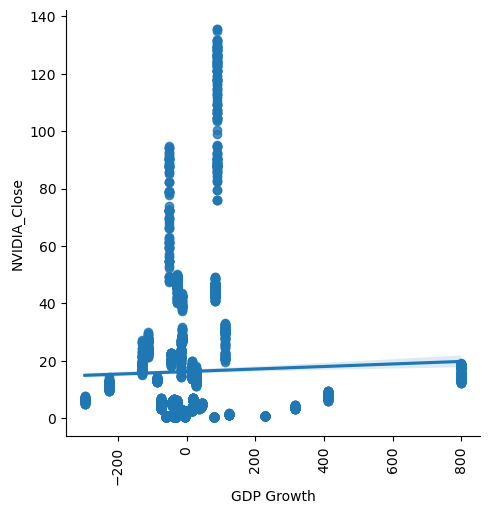

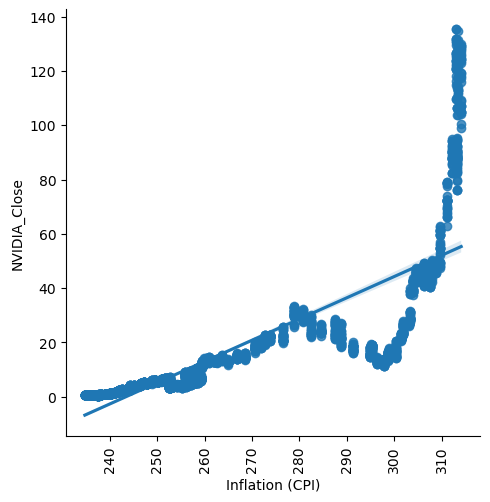

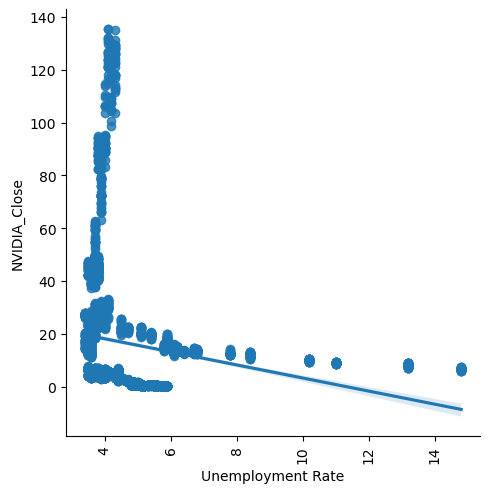

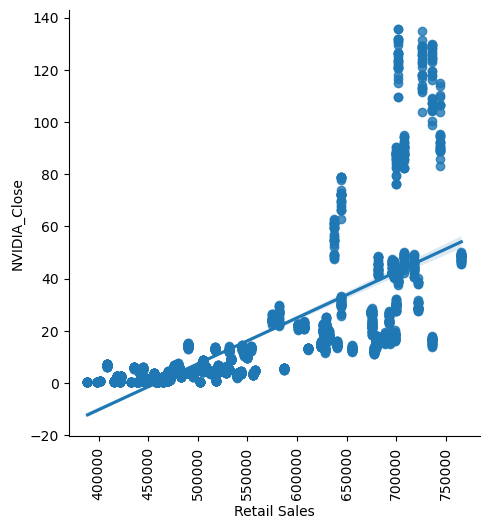

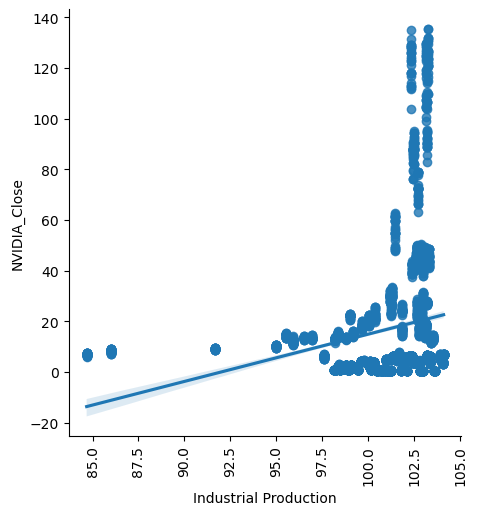

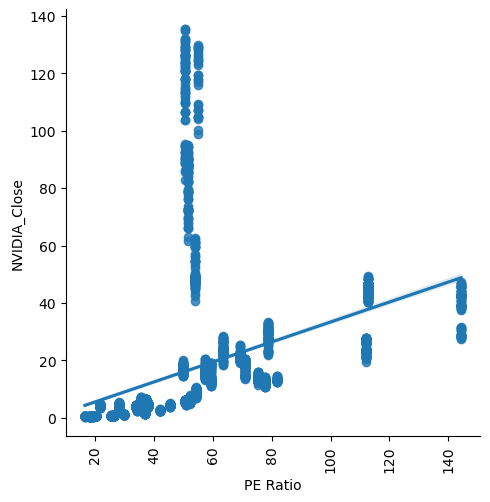

In [40]:
# Draw scatter plots with regression lines

import matplotlib.pyplot as plt
import seaborn as sns

def plot_reg(col):
    sns.lmplot(x=col, y='NVIDIA_Close', data=final_df_nvidia_close)
    plt.xticks(rotation=90)
    # plt.savefig(f'pairs{col}.png', bbox_inches='tight')

cols = [i for i in final_df_nvidia_close.columns.values.tolist() if i not in ["NVIDIA_Close", "Quarterly EPS"]]
for col in cols:
    plot_reg(col)

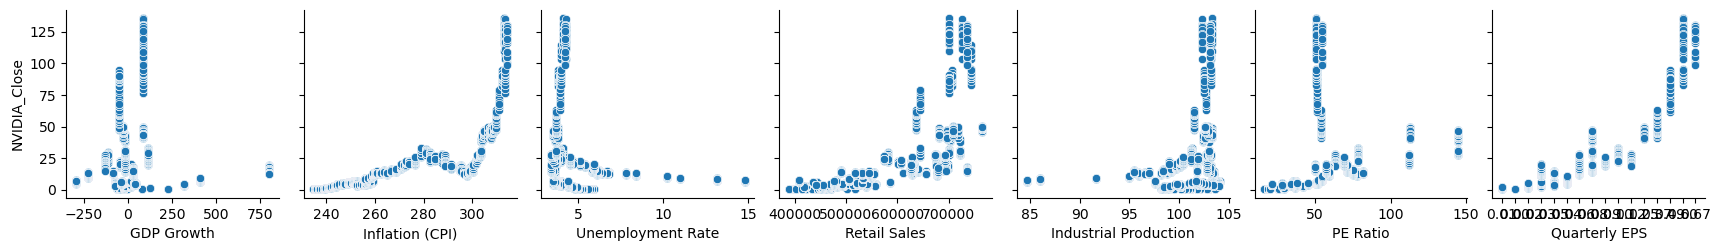

In [42]:
# Plot pair plots

pp = sns.pairplot(data=final_df_nvidia_close,
                  y_vars=['NVIDIA_Close'],
                  x_vars=['GDP Growth', 'Inflation (CPI)', 'Unemployment Rate', 'Retail Sales', 'Industrial Production', 'PE Ratio', 'Quarterly EPS'])

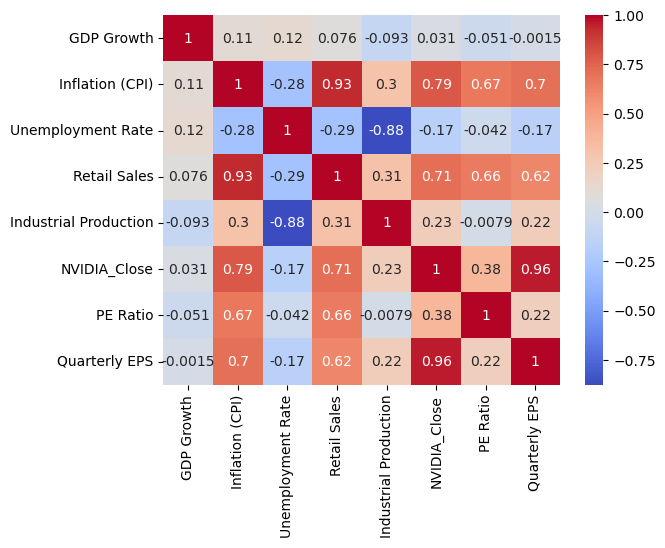

In [45]:
# Plot heatmap

sns.heatmap(final_df_nvidia_close.corr(), annot=True, cmap='coolwarm')
#plt.savefig('heatmap.png')
plt.show()

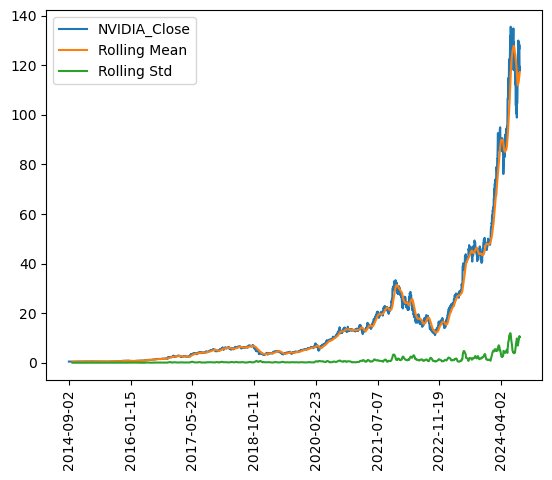

In [47]:
# Plot NVIDIA Closing Price with Rolling Mean and Rolling Std Dev.

final_df_nvidia_close['Rolling Mean'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).mean()
final_df_nvidia_close['Rolling Std'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).std()
final_df_nvidia_close[['NVIDIA_Close', 'Rolling Mean', 'Rolling Std']].plot()
plt.xticks(rotation=90)
#plt.savefig('ma.png', bbox_inches='tight') 
plt.show()